In [9]:
import numpy as np
import pysindy as ps
from pysindy.feature_library import PolynomialLibrary, FourierLibrary, CustomLibrary, ConcatLibrary
import matplotlib.pyplot as plt

from decimal import Decimal
from generate_data import generate_population_data, generate_discrete_population_data

In [10]:
t = np.linspace(0, 100, 1001)

x0 = [50, 50]
x0_val = [100, 30]

u = lambda t : np.sin(t)
u_val = lambda t : np.cos(2*t)

In [11]:
x, x_dot = generate_population_data(t, x0, u)
x_val, _ = generate_population_data(t, x0_val, u_val)

In [12]:
T = 1e-1
xk = generate_discrete_population_data(t, x0, T=T, u=u(t))
xk_val = generate_discrete_population_data(t, x0_val, T=T, u=u_val(t))

In [39]:
pr = int(3 - np.log10(T))
model = ps.SINDy(
    # feature_library=PolynomialLibrary(degree=1), # 2, 1
    feature_library=FourierLibrary(n_frequencies=1), # 2, 1
    optimizer=ps.STLSQ(threshold=2), # 0.001, 0.01, 0.1
    feature_names=[f'x{i+1}' for i in range(len(x_dot[0]))]+['u'],
    # discrete_time=True
    )
model.fit(x=x, x_dot=x_dot, u=u(t))
model.print(precision=pr)

(x1)' = 2.6233 sin(1 x1) + -10.2252 sin(1 x2) + 3.2173 cos(1 x2)
(x2)' = 2.0903 sin(1 u)


In [35]:
# t = np.linspace(0, 100, 1001)
# for x_num in range(len(x0)):
#     q = 'Biblioteka funkcji & Próg & $\Dot{x}'
#     print(f'{q}_{x_num+1}$ & $E_{x_num+1}$ \\\\')
#     for i, library in enumerate([FourierLibrary(n_frequencies=2), FourierLibrary(n_frequencies=1), PolynomialLibrary(degree=2), PolynomialLibrary(degree=1)]):
#         print(f'\\hline')
#         for threshold in range(3):
#             threshold = 10**(threshold-3) if i >= 2 else 100*10**(threshold-3)
#             threshold = T * threshold
#             name = ['Trygonometryczna (st. 2)', 'Trygonometryczna (st. 1)', 'Wielomiany (st. 2)', 'Liniowa']
#             model = ps.SINDy(
#                 feature_library=library,
#                 optimizer=ps.STLSQ(threshold=threshold),
#                 feature_names=[f'x{i+1}' for i in range(len(x0))]+['u'],
#                 discrete_time=True
#                 )
#             model.fit(x=xk, u=u(t))
#             # try:
#             x_sim = model.simulate(x0=x0_val, t=1001, u=u_val(t))
#             mse = ((x_sim - xk_val)**2).mean(axis=0)
#             E = '%.3E' % Decimal(str(mse[x_num]))
#             # except:
#             #     E = '\infty'
#             coeffs = ' + '.join(['%.3E' % Decimal(str(coeff))+' '+model.get_feature_names()[i] for i, coeff in enumerate(model.coefficients()[x_num]) if abs(model.coefficients()[x_num][i]) > threshold])
#             if len(coeffs.split(' + ')) > 2:
#                 eq = (coeffs.split(' + ')[0] + ' + ' + coeffs.split(' + ')[1] + '\dots').replace(' 1 +', ' +')
#             else:
#                 eq = coeffs
#             if len(coeffs) == 0:
#                 eq = '0,000'
#             eq = eq.replace(' 1 +', ' +').replace('.', ',').replace('+ -', '- ').replace('sin', '\sin').replace('cos', '\cos').replace('(1 x1)', '(x_1)').replace('(1 x2)', '(x_2)').replace('x2', 'x_2').replace('x1', 'x_1').replace('(1 u)', '(u)')
#             for pow in range(1, 10):
#                 eq = eq.replace('E+00', '')
#                 E = E.replace('E+00', '')
#                 eq = eq.replace(f'E+0{pow}', f'\cdot 10^{pow}').replace(f'E-0{pow}', '\cdot 10^{'+f'{-pow}'+'}')
#                 E = E.replace(f'E+0{pow}', f'\cdot 10^{pow}').replace(f'E-0{pow}', '\cdot 10^{'+f'{-pow}'+'}')
#             print(f"{name[i]} & {(str(threshold).replace('.', ',') + ' &').replace(',0 &', ' &')} ${eq}$ & ${E.replace('.', ',')}$ \\\\")
#     print('\n\n')

In [40]:
x_sim = model.simulate(x0=x0_val, t=t, u=u_val)
mse = ((x_sim - x_val)**2).mean(axis=0)
print(f'Błąd średniokwadratowy x1: {mse[0]:.2f}, x2: {mse[1]:.2f}')

Błąd średniokwadratowy x1: 216940.64, x2: 141.43


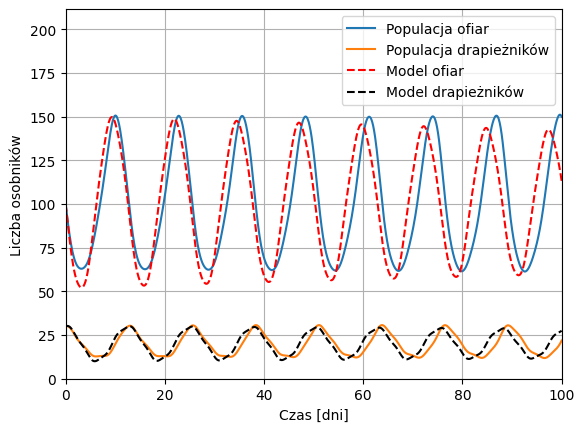

In [37]:
plt.plot(t, x_val[:, 0])
plt.plot(t, x_val[:, 1])
plt.plot(t, x_sim[:, 0], "r--")
plt.plot(t, x_sim[:, 1], "k--")
plt.ylim(0, max(x_val[:, 0]*1.4))
plt.xlim(0, max(t))
plt.grid()
plt.legend(["Populacja ofiar", "Populacja drapieżników", "Model ofiar", "Model drapieżników"])
plt.ylabel("Liczba osobników")
plt.xlabel("Czas [dni]")
# ax1 = plt.gca()
# ax2 = ax1.twinx()
# ax2.spines['right'].set_color('green')
# ax2.yaxis.label.set_color('green')
# ax2.tick_params(axis='y', colors='green')
# ax2.plot(t, u_val(t), 'g--', alpha=0.4)
# ax2.set_ylabel("Sterowanie")
# ax2.set_ylim(-3, 8)
# ax1.set_ylabel("Liczba osobników")
# ax2.set_ylabel("Sterowanie")
plt.show()